# Guide to analyse a `Grid`
- A grid of secondaries is analysed for a given primary
- Recovered parameters of secondaries are compared with input parameters

In [1]:
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
import sed_analysis_tools as st
import warnings
warnings.filterwarnings("ignore")

# Assumed filter system
filter_set = st.FilterSet(list_pivot_wavelengths=np.logspace(3.1, 4.7, 20) * u.Angstrom)
print(filter_set.list_pivot_wavelengths)

[ 1258.92541179  1528.30673266  1855.32951135  2252.32770499
  2734.27445617  3319.34681844  4029.6113202   4891.85622354
  5938.60186759  7209.32720222  8751.95877204 10624.67830894
 12898.11710826 15658.01995138 19008.47904698 23075.85996195
 28013.56761199 34007.83206543 41284.73237715 50118.72336273] Angstrom


## Creating a grid of secondaries

Total secondaries: 10000


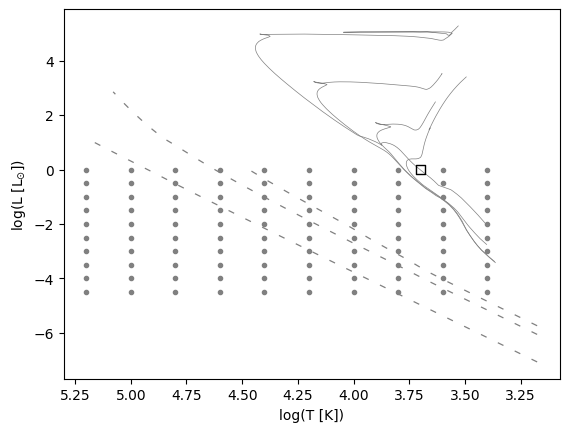

In [2]:
logT_A, logL_A = 3.7, 0
frac_err = 0.01
logT_B_list = np.linspace(3.4,5.2,10)
logL_B_list = np.linspace(-4.5,0,10)
logT_B_list, logL_B = np.meshgrid(logT_B_list, logL_B_list)
logT_B_list, logL_B_list = logT_B_list.flatten(), logL_B.flatten()

print("Total secondaries:", len(logT_B_list) * len(logL_B_list))
fig, ax = plt.subplots()
st.Plotter.plot_isochrone_and_wd(ax)
plt.scatter(logT_A, logL_A, marker="s", edgecolors="k", facecolor="none")
plt.scatter(logT_B_list, logL_B_list, marker=".", color="0.5")

In [3]:
grid = st.Grid(
    T_A=10**logT_A * u.K,
    L_A=10**logL_A * u.solLum,
    logT_B_list=logT_B_list,
    logL_B_list=logL_B_list,
    niter=100,
    frac_err=frac_err,
    name="test_grid",
    filter_set=filter_set
)

## Calculating fitting parameter across the grid and plotting

In [ ]:
grid.calculate_params(refit=True)

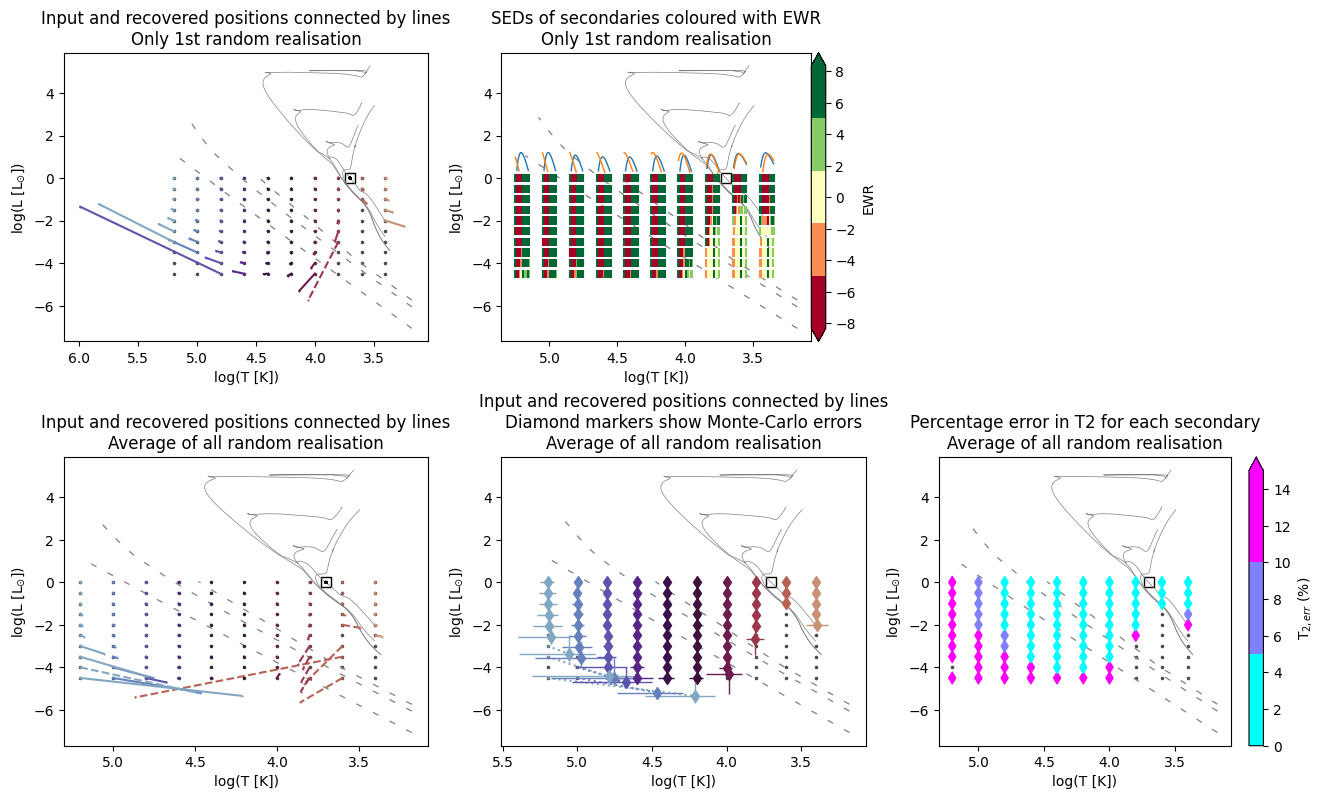

In [5]:
grid.plot()

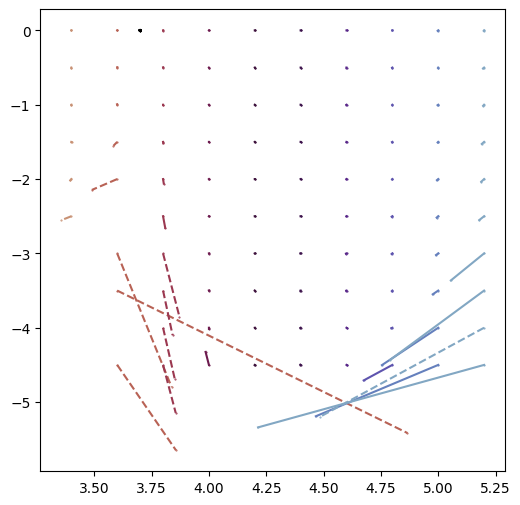

In [6]:
# Input and recovered positions connected by lines
# Average of all random realisation
grid.plot_Double_fitting_lines()

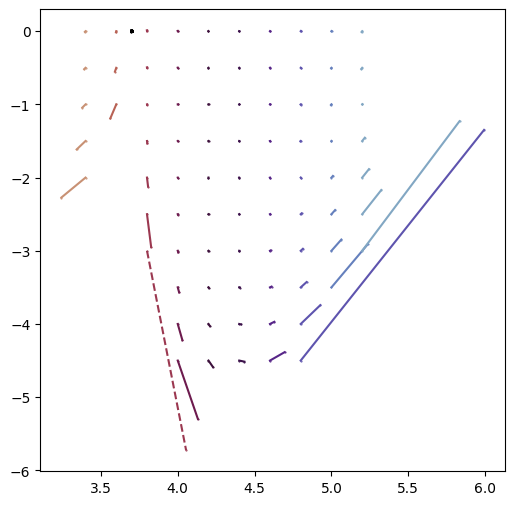

In [7]:
# Input and recovered positions connected by lines
# Only 1st random realisation
grid.plot_Double_fitting_lines(niter=0)

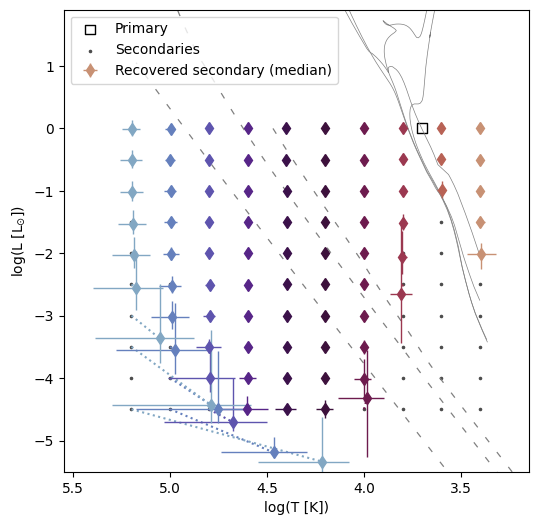

In [11]:
# Input and recovered positions connected by lines
# Diamond markers show Monte-Carlo errors
# Average of all random realisation
fig, ax = plt.subplots(figsize=(6,6))
grid.plot_Double_fitting_points(ax=ax)
grid.plot_skeleton(ax=ax)
st.Plotter.plot_isochrone_and_wd(ax=ax)
ax.set_ylim(-5.5,1.9)
ax.set_xlim(5.55,3.15)
ax.legend()

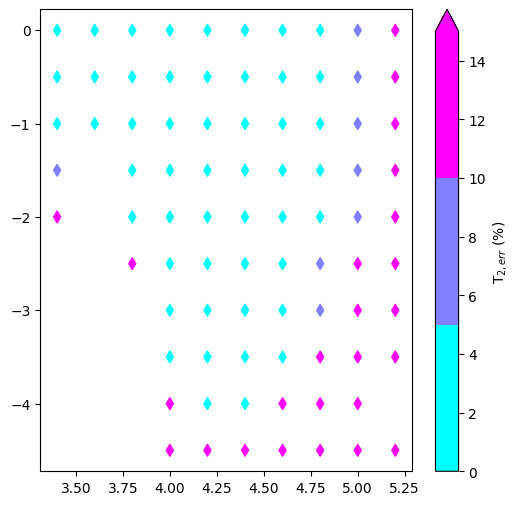

In [9]:
# Recovered % errors in T_2
grid.plot_Double_fitting_T2err()

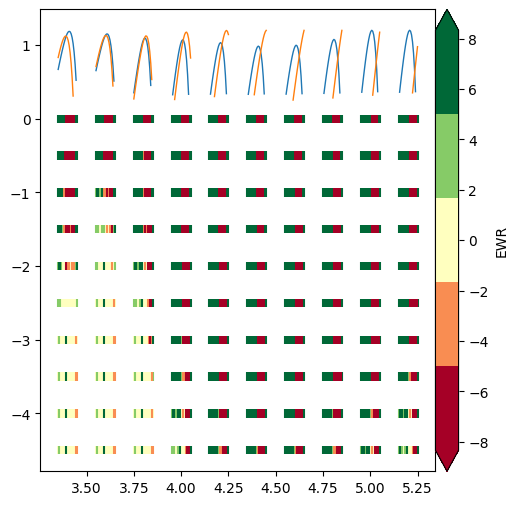

In [10]:
# SEDs of secondaries coloured with EWR
# Only 1st random realisation
grid.plot_sed_patches()